In [1]:
# Next 9 code boxes convert the mass spec CVS to an image
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = "/Users/wanglab/Downloads/MSI.csv" 
# Read the CSV file, but only load the first column (index 0) into the DataFrame
df = pd.read_csv(file_path, usecols=[0])  
# Add a new column that counts the number of semicolons in each row of the first column
df['Semicolon_Count'] = df.iloc[:, 0].astype(str).apply(lambda x: x.count(';'))

In [3]:
# Display the DataFrame
df  

,# Exported with SCiLS Lab Version 12.01.16074,Semicolon_Count
0,# Export time: 2025-01-10 14:42:23,0
1,# Generated from file: C:\Users\zizzy\Desktop\...,0
2,# Object Full Name: Regions/KB_Rett_SquareRegi...,0
3,# Object ID: 5d3d08a3-c882-4d77-8319-a07184fe1831,0
4,# Object type: Region,0
...,...,...
277,Spot 207109;0;0;0;0;0;0;0;0;0;0;0;0;0;0;2.6681...,138631
278,Spot 207110;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,138631
279,Spot 207111;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,138631
280,Spot 207112;0;1.1101604225233;0;0;0;0;0;0;0;0;...,138631


In [4]:
# Extract the text from the 10th row (index 9) of the first column and convert it to a string
text = str(df.iloc[9, 0])  

In [5]:
# Extract and display the first 100 characters of the text
text[0:100]  

'm/z;600;600.0029999953;600.00600000559;600.00900003089;600.01200007119;600.01500012649;600.018000196'

In [7]:
# Define the target value and a tolerance range for comparison
target_value = 885.5360  
tolerance = 0.0088  
lower_bound = target_value - tolerance  
upper_bound = target_value + tolerance  

# Split the extracted text into a list of values using semicolons as delimiters
values = text.split(';')  

# Convert the list of values into numeric format, adding `None` for non-numeric entries
numeric_values = []  
for val in values:  
    try:
        numeric_values.append(float(val))  # Convert to float if possible
    except ValueError:
        numeric_values.append(None)  # Add None if conversion fails

# Find positions where numeric values fall within the specified range
positions = [i + 1 for i, v in enumerate(numeric_values) if v is not None and lower_bound <= v <= upper_bound]

# Print the positions of matching values or notify if none are found
if positions:
    print(f"Numbers within range {lower_bound} to {upper_bound} are found at positions: {positions}")
else:
    print("No numbers found within the specified range.")

Numbers within range 885.5272 to 885.5447999999999 are found at positions: [77854, 77855, 77856]


In [9]:
# Extract text from the 11th row (index 10) and split it into values using semicolons
text_line_12 = str(df.iloc[10, 0])  
values = text_line_12.split(';')  

# Define specific positions of interest
positions = [77854, 77855, 77856]  

# Extract values at the specified positions (if within bounds)
extracted_values = {pos: values[pos - 1] for pos in positions if pos - 1 < len(values)}  

# Print the extracted values with their positions
print("Extracted Values:")  
for pos, val in extracted_values.items():  
    print(f"Position {pos}: {val}")  

Extracted Values:
Position 77854: 0
Position 77855: 1407.3663399571
Position 77856: 0


In [10]:
# Define start and end rows for processing
start_row = 10  
end_row = 281  

# Define positions of interest for summing values
positions = [77854, 77855, 77856]  

# Initialize a dictionary to store summed values for each spot
sum_values_per_spot = {}  

# Loop through the specified rows
for row_idx in range(start_row, end_row + 1):  
    text_line = str(df.iloc[row_idx, 0])  # Extract text from the current row
    values = text_line.split(';')  # Split into a list of values
    
    # Assign a spot sequence number or fallback to a default name
    spot_sequence_number = values[0] if values else f"Unknown_{row_idx}"  
    extracted_values = [float(values[pos - 1]) for pos in positions if pos - 1 < len(values)]  # Extract numeric values
    row_sum = sum(extracted_values)  # Sum the extracted values
    
    # Store the result in the dictionary
    sum_values_per_spot[spot_sequence_number] = row_sum  

# Print the summed values for each spot
for spot, total in sum_values_per_spot.items():  
    print(f"Spot {spot}: Sum = {total}")  

Spot Spot 203446: Sum = 1407.3663399571
Spot Spot 203447: Sum = 1284.6995151084
Spot Spot 203448: Sum = 1305.8729652578
Spot Spot 203449: Sum = 1087.1709897642
Spot Spot 203450: Sum = 1190.9457596853
Spot Spot 203451: Sum = 1265.1181056118
Spot Spot 203452: Sum = 986.14101020447
Spot Spot 203453: Sum = 1077.6755299869
Spot Spot 203454: Sum = 1159.4782382608
Spot Spot 203455: Sum = 889.31606941554
Spot Spot 203456: Sum = 1102.3228902643
Spot Spot 203457: Sum = 911.57616616009
Spot Spot 203458: Sum = 1082.7751967869
Spot Spot 203459: Sum = 836.67379184681
Spot Spot 203460: Sum = 880.28260671758
Spot Spot 203461: Sum = 732.76789702962
Spot Spot 203462: Sum = 893.30252994101
Spot Spot 203665: Sum = 1402.2054092411
Spot Spot 203666: Sum = 1127.1202122043
Spot Spot 203667: Sum = 1237.1094933013
Spot Spot 203668: Sum = 1008.4887857766
Spot Spot 203669: Sum = 1204.907118743
Spot Spot 203670: Sum = 1311.3002882904
Spot Spot 203671: Sum = 963.16290651552
Spot Spot 203672: Sum = 1123.6564290369
S

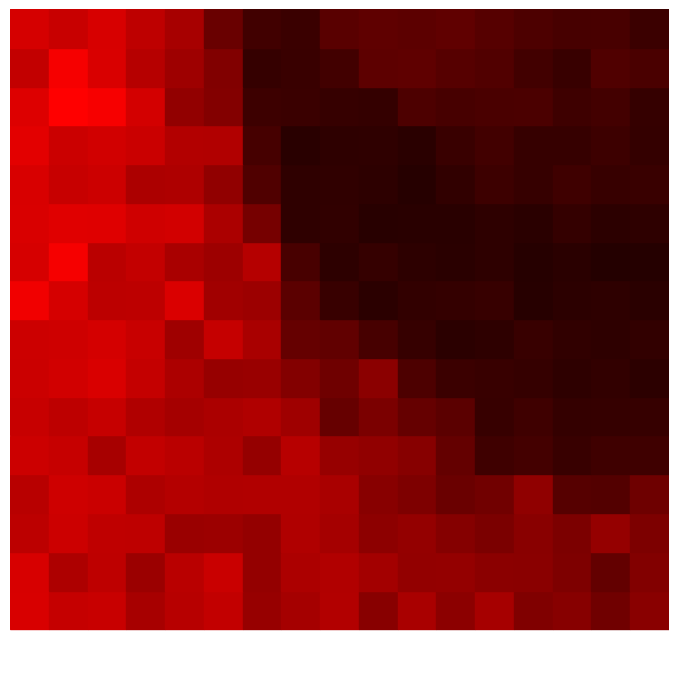

In [11]:
import matplotlib.pyplot as plt
import os

# Example dictionary of sums for demonstration; replace with your data
# sum_values_per_spot = {
#     'Spot 203461': 123.53388, 
#     'Spot 203462': 49.18488, 
#     ... 
# }

# 1) Extract spot numbers and their corresponding values
spot_numbers = [int(spot.split()[1]) for spot in sum_values_per_spot.keys()]  
spot_values = list(sum_values_per_spot.values())  

# 2) Normalize red intensity values to a 0–1 scale
max_value = max(spot_values)  
normalized_values = [v / max_value for v in spot_values]  

# 3) Sort spots and their intensities by spot number
sorted_spots = sorted(zip(spot_numbers, normalized_values))  

# 4) Calculate the maximum length of consecutive sequences
max_consecutive_length = 0  
current_length = 1  

for i in range(1, len(sorted_spots)):  
    if sorted_spots[i][0] == sorted_spots[i - 1][0] + 1:  # Check for consecutive numbers
        current_length += 1  
    else:  
        max_consecutive_length = max(max_consecutive_length, current_length)  
        current_length = 1  

# Finalize the maximum consecutive length
max_consecutive_length = max(max_consecutive_length, current_length)  

# 5) Set pixel size for visualization
pixel_size = 1  

# 6) Initialize the plot for visualizing spots as red pixels
fig, ax = plt.subplots(
    figsize=(max_consecutive_length * pixel_size / 2, len(sorted_spots) * pixel_size / 10)
)

y_pos = 0  # Track the row position
prev_spot = None  
x_pos = 0  # Track column position

# 7) Plot each spot as a red pixel with varying intensity
for (spot, intensity) in sorted_spots:
    if prev_spot is None or spot != prev_spot + 1:  # Start a new row if gap found
        y_pos += 1  
        x_pos = 0  

    ax.add_patch(
        plt.Rectangle(
            (x_pos * pixel_size, y_pos * pixel_size),
            pixel_size, pixel_size,
            color=(intensity, 0, 0)
        )
    )
    x_pos += 1
    prev_spot = spot  

# 8) Adjust plot limits, remove ticks, and ensure square pixels
ax.set_xlim(0, max_consecutive_length * pixel_size)  
ax.set_ylim(0, y_pos * pixel_size + pixel_size)  
ax.set_xticks([])  
ax.set_yticks([])  
ax.set_aspect('equal')  
ax.axis('off')  

# 9) Save the figure to Downloads folder
save_path = os.path.join(os.path.expanduser("~"), "Downloads", "MSI.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')

# 10) Display the plot
plt.show()
